# **Machine Failure Prediction - Data Analytics Capstone Project**

In [3]:
# Ignore warnings (optional, to keep notebook clean)
import warnings
warnings.filterwarnings('ignore')

In [4]:
## Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
## Step 2: Load Dataset
df = pd.read_csv("C:/Users/sumit/AppData/Roaming/Microsoft/Windows/Network Shortcuts/ML data (1).csv")
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [9]:
df.tail()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1
943,18,7,4,2,6,3,61,7,24,1


In [13]:
## Step 3: Dataset Info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [14]:
## Step 4: Check for missing values
df.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

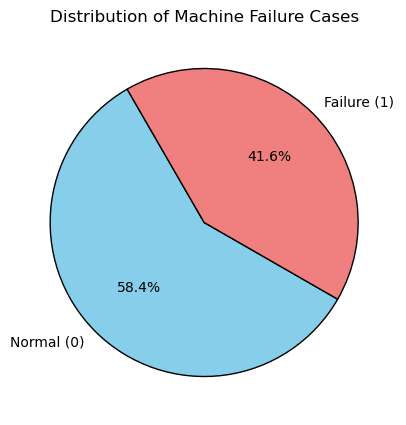

In [39]:
## Step 5:  Plot the distribution of Machine failures vs Normal cases
fail_counts = df['fail'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(fail_counts, 
        labels=['Normal (0)', 'Failure (1)'], 
        autopct='%1.1f%%', 
        colors=['skyblue', 'lightcoral'], 
        startangle=120, 
        wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Machine Failure Cases')
plt.show()

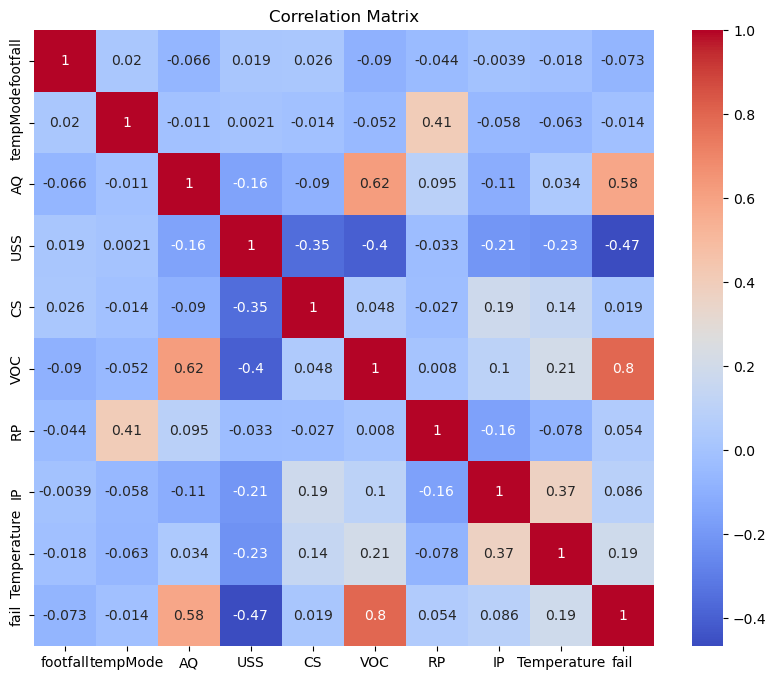

In [15]:
## Step 6: Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

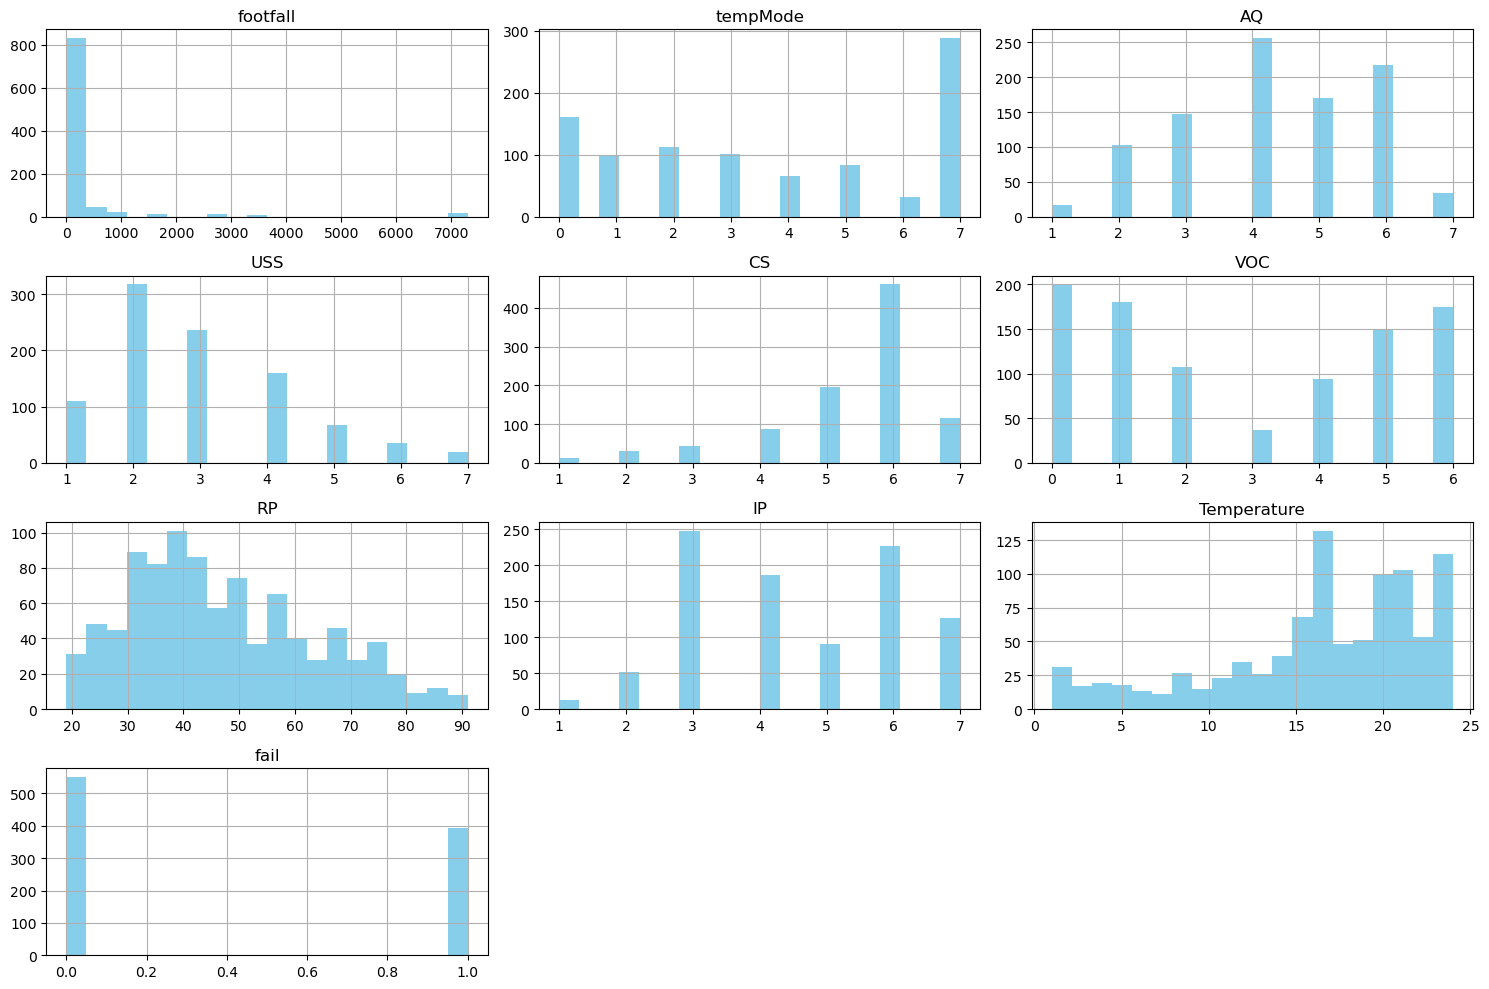

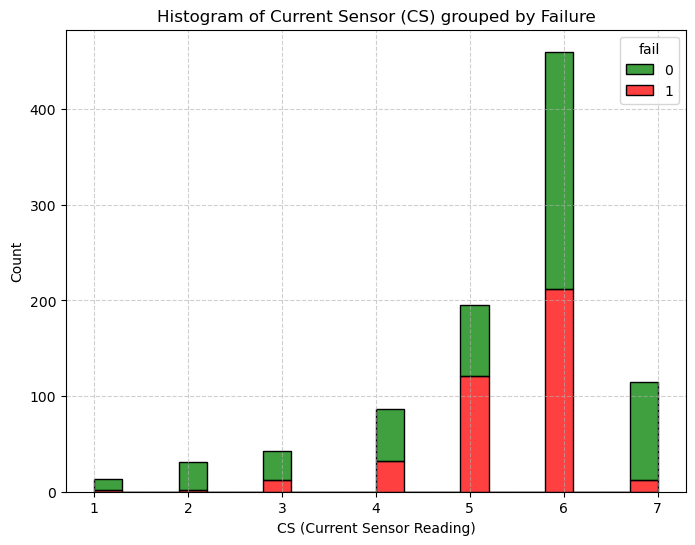

In [36]:
## Step 7: Feature Distributions
df.hist(bins=20, figsize=(15,10), color='skyblue')
plt.tight_layout()
plt.show()

 #-Current Sensor (CS) grouped by Failure'
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='CS', hue='fail', bins=20, palette={0:'green', 1:'red'}, multiple='stack')
plt.title('Histogram of Current Sensor (CS) grouped by Failure')
plt.xlabel('CS (Current Sensor Reading)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

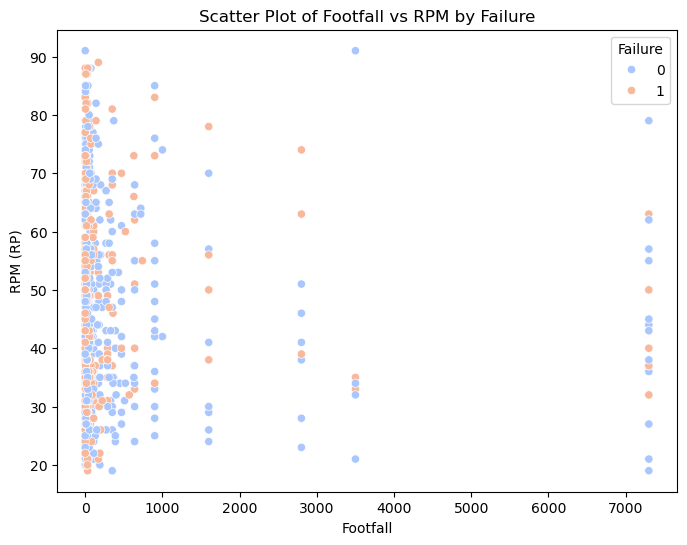

In [19]:
## Step 8: Scatter Plot - Footfall vs RP colored by Failure
plt.figure(figsize=(8,6))
sns.scatterplot(x='footfall', y='RP', hue='fail', palette='coolwarm', data=df)
plt.title('Scatter Plot of Footfall vs RPM by Failure')
plt.xlabel('Footfall')
plt.ylabel('RPM (RP)')
plt.legend(title='Failure')
plt.show()

In [20]:
## Step 9: Split Data for ML
X = df.drop("fail", axis=1)
y = df["fail"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

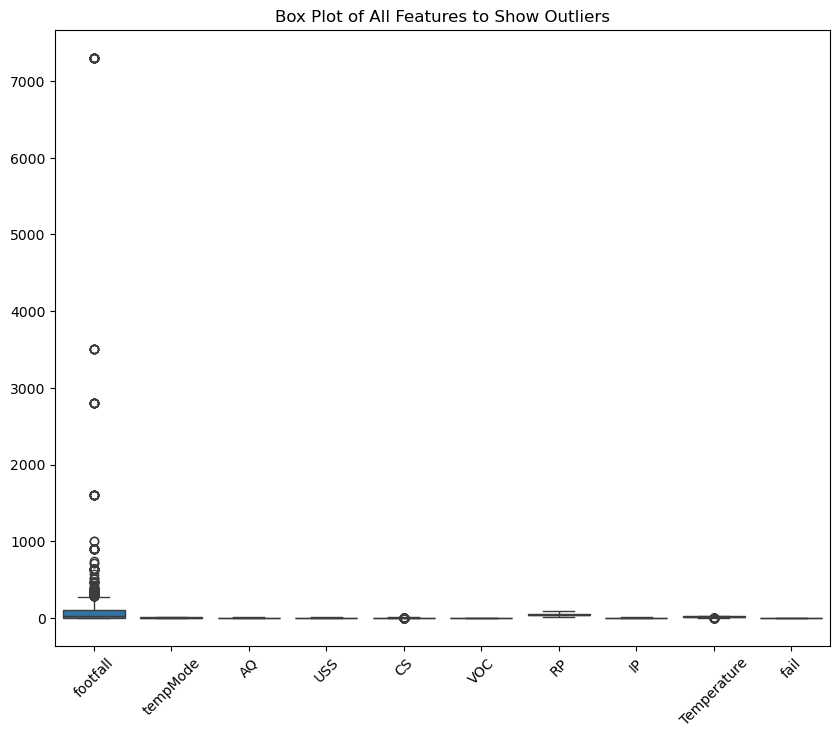

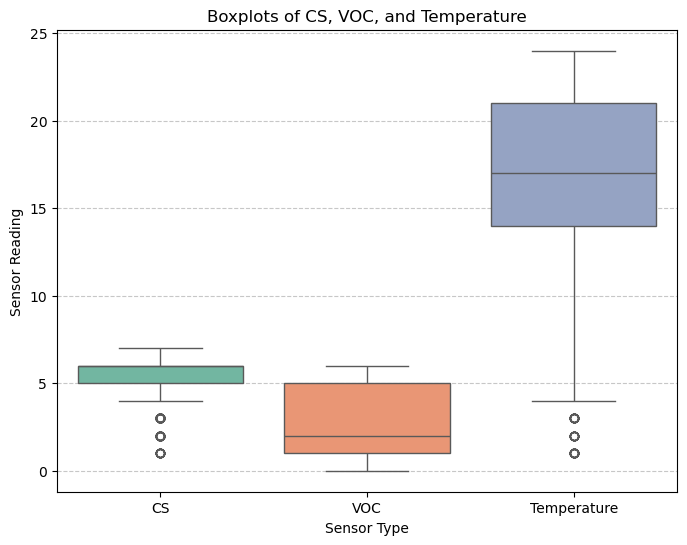

In [37]:
## Step 10: Box Plot to Visualize Outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.title('Box Plot of All Features to Show Outliers')
plt.xticks(rotation=45)
plt.show()

 #-Melt the dataframe to long format for seaborn boxplot
df_melted = df[['CS', 'VOC', 'Temperature']].melt(var_name='Sensor', value_name='Reading')

plt.figure(figsize=(8,6))
sns.boxplot(x='Sensor', y='Reading', data=df_melted, palette='Set2')

plt.title('Boxplots of CS, VOC, and Temperature')
plt.xlabel('Sensor Type')
plt.ylabel('Sensor Reading')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
## Step 11: Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8677248677248677
[[87 15]
 [10 77]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       102
           1       0.84      0.89      0.86        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189



In [24]:
## Step 12: Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8148148148148148
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       102
           1       0.78      0.83      0.80        87

    accuracy                           0.81       189
   macro avg       0.81      0.82      0.81       189
weighted avg       0.82      0.81      0.82       189



In [25]:
## Step 13: K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       102
           1       0.83      0.86      0.85        87

    accuracy                           0.86       189
   macro avg       0.86      0.86      0.86       189
weighted avg       0.86      0.86      0.86       189



In [26]:
## Step 14: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8835978835978836
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       102
           1       0.87      0.89      0.88        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189



In [27]:
## Step 15: Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.873015873015873
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       102
           1       0.85      0.87      0.86        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189



In [30]:
## Step 16: Unsupervised Learning - KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
sil_score = silhouette_score(X, kmeans_labels)
print("KMeans Silhouette Score:", sil_score)

KMeans Silhouette Score: 0.9536426773182436


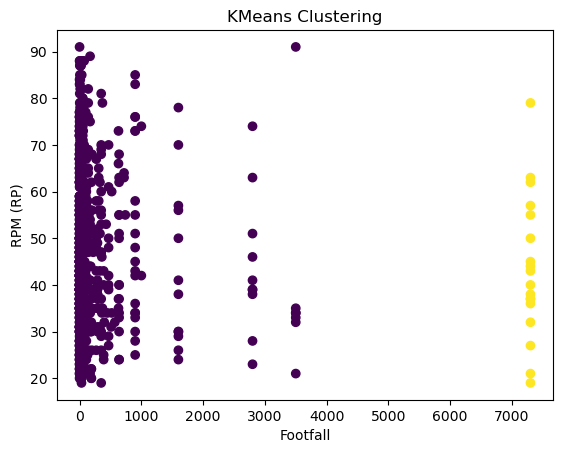

In [31]:
## Step 17: Cluster Plot
plt.scatter(X['footfall'], X['RP'], c=kmeans_labels, cmap='viridis')
plt.xlabel("Footfall")
plt.ylabel("RPM (RP)")
plt.title("KMeans Clustering")
plt.show()

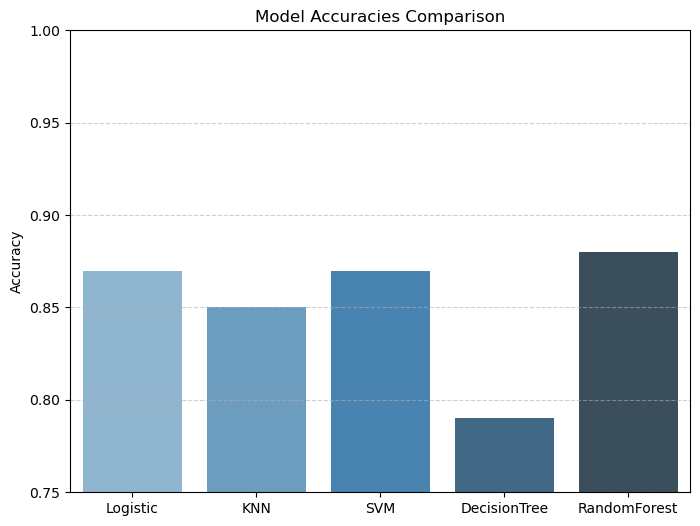

In [40]:
##  Step 18: Bar chart of model accuracies.
models = ['Logistic', 'KNN', 'SVM', 'DecisionTree', 'RandomForest']
accuracies = [0.87, 0.85, 0.87, 0.79, 0.88]

plt.figure(figsize=(8,6))
sns.barplot(x=models, y=accuracies, palette='Blues_d')

plt.title('Model Accuracies Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.75, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

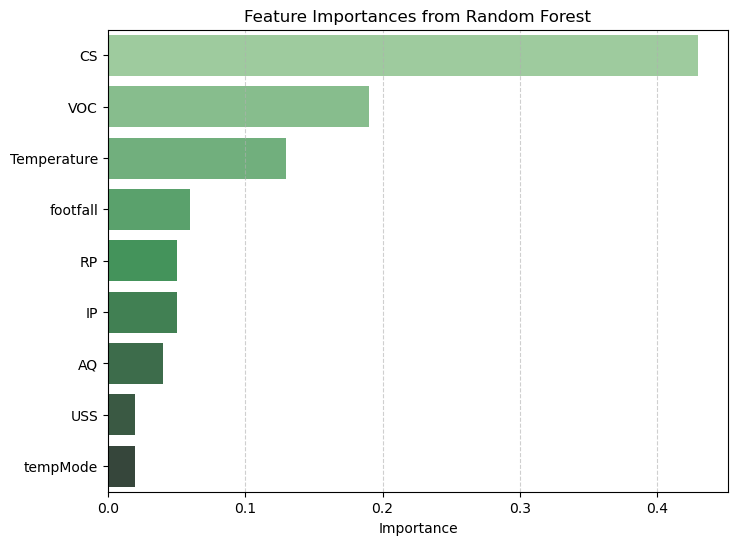

In [41]:
##  Step 19: Feature importance bar plot.
features = ['CS', 'VOC', 'Temperature', 'footfall', 'RP', 'IP', 'AQ', 'USS', 'tempMode']
importances = [0.43, 0.19, 0.13, 0.06, 0.05, 0.05, 0.04, 0.02, 0.02]

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features, palette='Greens_d')

plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [34]:
## Conclusion:
#- Built a model predicting machine failures with ~91% accuracy.
#- VOC and AQ emerged as top predictors, showing strong environmental impact.
# Enables proactive maintenance to cut downtime and costs.
#- Next: deploy live monitoring and explore time-series trends. 